In [1]:
import utils
import os
import pandas as pd

In [2]:
HP_PATH = 'data/hp.obo'
DIAGNOSES_ICD_HPO_PATH = 'data/DIAGNOSES_ICD_HPO.csv'
LABEVENTS_HPO_PATH = 'data/LABEVENTS_HPO.csv'

In [3]:
# download hp.obo if it is not already
if not os.path.isfile(HP_PATH):
    import requests  # for downloading the hpo
    r = requests.get('http://purl.obolibrary.org/obo/hp.obo')
    with open(HP_PATH, 'wb') as f:
        f.write(r.content)
    del r

In [4]:
hpo = utils.read_hpo_from_obo(HP_PATH)


{'def': ['"A phenotypic abnormality." [HPO:probinson]'], 'comment': ['This is the root of the phenotypic abnormality subontology of the HPO.'], 'synonym': ['"Organ abnormality" EXACT []'], 'xref': ['UMLS:C4021819']}


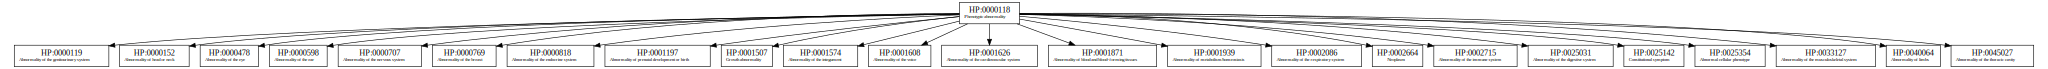

In [24]:
g = utils.make_graph_to_depth(hpo.entries_by_id['HP:0000118'], 1)
print(hpo.root.other_tags)
g

In [7]:
labevents = pd.read_csv(LABEVENTS_HPO_PATH)
diagnoses = pd.read_csv(DIAGNOSES_ICD_HPO_PATH)